<a href="https://colab.research.google.com/github/snehasri2600/Ocean-Classification/blob/main/Ocean_Class_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 37.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/snehasri2600/Ocean-Classification/refs/heads/main/Ocean_Class_Cleaned_Data.csv')
display(df)

,atm_surface_temp,atm_surface_humidity,zonal_wind_speed,meridional_wind_speed,wind_speed,atm_surface_pressure,seawater_density_anomaly,hydrostatic_pressure_anomaly,realm
0,258.80704,0.002396,-1.421412,1.504944,3.966997,98732.860,-1.497837,120.33860,Southern Cold Water
1,258.80704,0.002396,-1.421412,1.504944,3.966997,98732.860,-1.497837,120.33860,Southern Cold Water
2,259.48505,0.002413,-1.475978,1.528884,4.023276,98726.880,-1.499950,123.39962,Southern Cold Water
3,259.48505,0.002413,-1.475978,1.528884,4.023276,98726.880,-1.499950,123.39962,Southern Cold Water
4,260.28888,0.002427,-1.533721,1.645065,4.075678,98722.550,-1.505903,130.80351,Southern Cold Water
...,...,...,...,...,...,...,...,...,...
51941,253.90776,0.000719,-3.107174,4.886118,7.411502,102083.305,-3.039971,109.26570,Northern Cold Water
51942,253.90776,0.000719,-3.107174,4.886118,7.411502,102083.305,-3.039971,109.26570,Northern Cold Water
51943,253.90776,0.000719,-3.107174,4.886118,7.411502,102083.305,-3.039971,109.26570,Northern Cold Water
51944,253.90776,0.000719,-3.107174,4.886118,7.411502,102083.305,-3.039971,109.26570,Northern Cold Water


In [ ]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Define features (X) and target (y)

# Dropping 'realm' from the features column so we can use all other variables as features, and label the target as the 'realm'
X = df.drop(['realm'], axis=1)
y = df['realm']

# Split into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
# Apply the same transformations as were applied in the previous code
X_train['atm_surface_temp'] = (X_train['atm_surface_temp'])**2
X_test['atm_surface_temp'] = (X_test['atm_surface_temp'])**2

X_train['atm_surface_pressure'] = (X_train['atm_surface_pressure'])**2
X_test['atm_surface_pressure'] = (X_test['atm_surface_pressure'])**2

X_train['hydrostatic_pressure_anomaly'] = np.log(X_train['hydrostatic_pressure_anomaly'])
X_test['hydrostatic_pressure_anomaly'] = np.log(X_test['hydrostatic_pressure_anomaly'])

In [ ]:
ohe = OneHotEncoder(sparse_output=False)

# Reshape y_train and y_test to be 2D arrays
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# OneHotEncoder on y_train and y_test data
y_train_encoded = ohe.fit_transform(y_train_reshaped)
y_test_encoded = ohe.transform(y_test_reshaped)

We can now start running supervised learning models on the dataset.

# Clustering without PCA

##K-Means without PCA

In [ ]:
!pip install mglearn
import mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 29.1 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#instantiate kmeans with 4 clusters to start
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train_scaled)

#Get assignments (labels)
assignments = kmeans.labels_

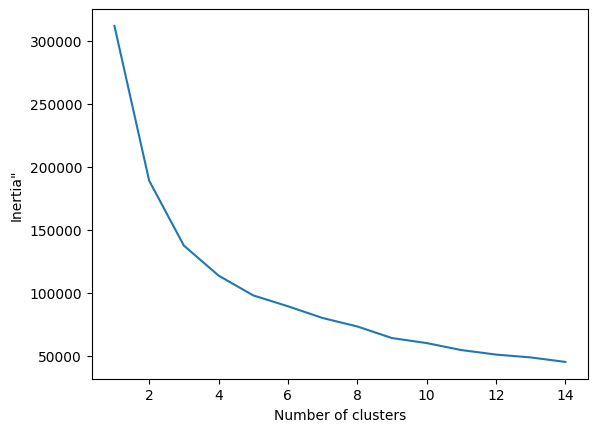

In [ ]:
# plot the elbow visualization
inertiaVals = {}

for k in range(1, 15):
    kmeansK = KMeans(n_clusters=k, max_iter=1000).fit(X_train_scaled)
    inertiaVals[k] = kmeansK.inertia_
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia"')
plt.show()

I looks like 8 clusters might be the idea value where the plot flattens out afterwards.

## Agglomerate/Hierarchical Clustering without PCA

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# instantiating agglomerative clustering with 8 clusters to compare results
agg = AgglomerativeClustering(n_clusters=4)

The dataset is too big to run agglomerative testing as is. We need to use train_test_split once again for a smaller piece of X_train data, and then rescale it.

In [ ]:
X_train_small, X_test_big, y_train_small, y_test_big = train_test_split(X, y, stratify=y, train_size=0.5, random_state=42)

In [ ]:
X_train_small_scaled = scaler.fit_transform(X_train_small)

In [ ]:
y_train_small_reshaped = y_train_small.values.reshape(-1, 1)
y_train_small_encoded = ohe.fit_transform(y_train_small_reshaped)

In [ ]:
agg.fit_predict(X_train_small_scaled)

array([3, 2, 3, ..., 3, 1, 1])

##DBScan without PCA

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [ ]:
dbscan.fit_predict(X_train_scaled)

array([0, 0, 0, ..., 0, 0, 0])

##ARI and Silhouette Coefficients without PCA

I will run both Adjusted Rand Index (ARI) and Silhouette Coefficient Methods to test the clustering models. However, in order to ensure that all models are running with the same input, we will have to use the X_train_small_scaled data. This way, we can compare the models on the same data without any RAM/runtime issues.

For both KMeans and agglomerative clustering, we will use the n_clusters = 6 argument because of the results from the elbow plot.

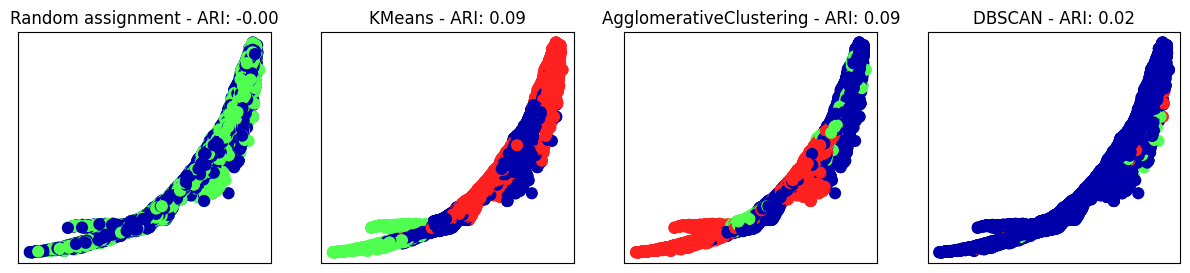

In [ ]:
# ARI Score
from sklearn.metrics.cluster import adjusted_rand_score

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=6), AgglomerativeClustering(n_clusters = 6), DBSCAN(eps=0.5, min_samples=5)]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_small_scaled))

# plot random assignment
axes[0].scatter(X_train_small_scaled[:, 0], X_train_small_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train_small, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_train_small_scaled)
    ax.scatter(X_train_small_scaled[:, 0], X_train_small_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train_small, clusters)))

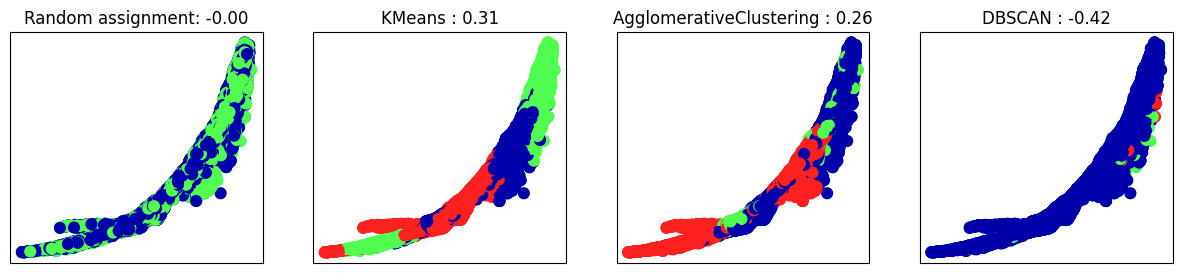

In [ ]:
# Silhouette score
from sklearn.metrics.cluster import silhouette_score


fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_small_scaled))

# plot random assignment
axes[0].scatter(X_train_small_scaled[:, 0], X_train_small_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_train_small_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=6), AgglomerativeClustering(n_clusters = 6),
              DBSCAN(eps=0.5, min_samples=5)]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_train_small_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_train_small_scaled[:, 0], X_train_small_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_train_small_scaled, clusters)))

# Clustering with PCA

##PCA Analysis

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# keep the components that explain 95% of the variance in the data
pca0 = PCA(n_components=0.95)
# fit PCA model to data
X_train_pca0 = pca0.fit_transform(X_train_scaled)

In [ ]:
pca0.n_components_

np.int64(5)

###KMeans with PCA

In [ ]:
# instantiate k-means with 4 components (same as we did without PCA)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train_pca0)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",4
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


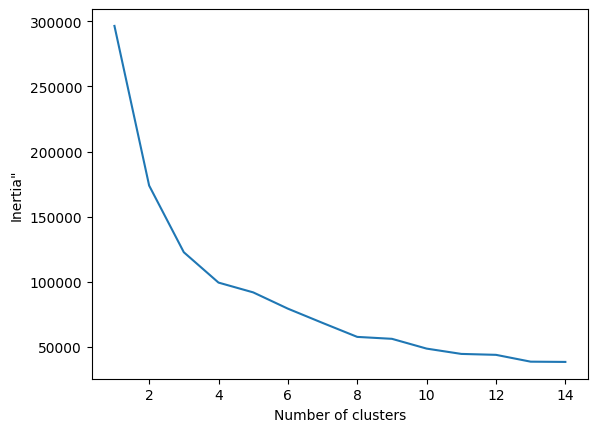

In [ ]:
# plot the elbow visualization
inertiaVals1 = {}

for k in range(1, 15):
    kmeansK1 = KMeans(n_clusters=k, max_iter=1000).fit(X_train_pca0)
    inertiaVals1[k] = kmeansK1.inertia_
plt.figure()
plt.plot(list(inertiaVals1.keys()), list(inertiaVals1.values()))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia"')
plt.show()

After PCA, it seems that 6 clusters is the ideal number of clusters to keep for analysis with K-Means.

### Agglomerative/Hierarchical Clustering with PCA

Same as above, we will create a smaller version of X_train to ensure that agglomerative clustering runs smoothly.

In [ ]:
X_train_small_pca = pca0.fit_transform(X_train_small_scaled)

In [ ]:
# from sklearn.cluster import AgglomerativeClustering

agg1 = AgglomerativeClustering(n_clusters=4)
agg1.fit_predict(X_train_small_pca)

array([1, 2, 0, ..., 1, 0, 0])

###DBScan with PCA

In [ ]:
from sklearn.cluster import DBSCAN
dbscan1 = DBSCAN(eps=0.5, min_samples=5)
dbscan1.fit_predict(X_train_pca0)

array([0, 0, 0, ..., 0, 0, 0])

##ARI and Silhouette Coefficient with PCA

Once again, we will run the Adjusted Rand Index and Silhouette Coefficient functions with the smaller version of the dataset for even comparison. We will use n_clusters = 6 again as well.

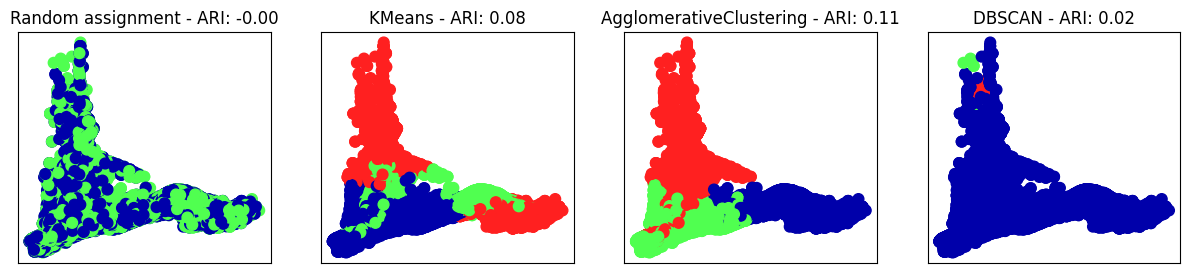

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms1 = [KMeans(n_clusters=6), AgglomerativeClustering(n_clusters=6), DBSCAN(eps=0.5, min_samples=5)]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_small_pca))

# plot random assignment
axes[0].scatter(X_train_small_pca[:, 0], X_train_small_pca[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train_small, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms1):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_train_small_pca)
    ax.scatter(X_train_small_pca[:, 0], X_train_small_pca[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train_small, clusters)))

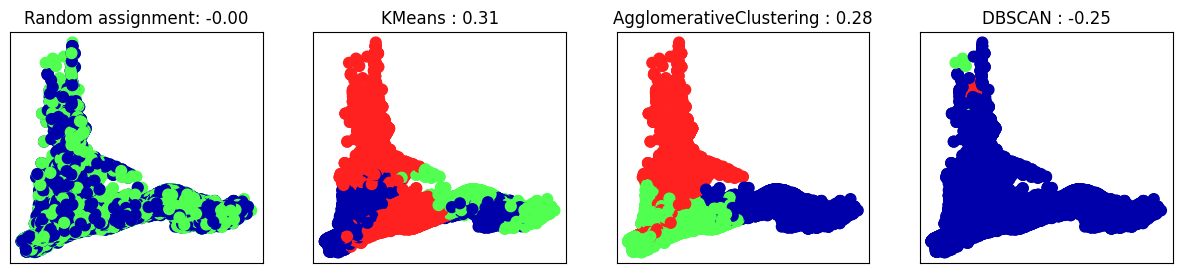

In [ ]:
from sklearn.metrics.cluster import silhouette_score

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_small_pca))

# plot random assignment
axes[0].scatter(X_train_small_pca[:, 0], X_train_small_pca[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_train_small_pca, random_clusters)))

algorithms = [KMeans(n_clusters=6), AgglomerativeClustering(n_clusters=6),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_train_small_pca)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_train_small_pca[:, 0], X_train_small_pca[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_train_small_pca, clusters)))

# Supervised Learning with PCA

Applying PCA feature selection to the best-performing models, which, in this case, was k-nearest neighbors.

In [ ]:
pca0.n_components_

np.int64(5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca0, y_train_encoded)
print(f'knn score: {knn.score(X_train_pca0, y_train_encoded)}')
knn.predict(X_train_pca0)

knn score: 0.9768987910367309


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
X_test_pca0 = pca0.fit_transform(X_test_scaled)

In [ ]:
print(f'knn (1 neighbor) score: {knn.score(X_test_pca0, y_test_encoded)}')
print(f'Classification report (1 neighbor):\n {classification_report(y_test_encoded, knn.predict(X_test_pca0))}')

knn (1 neighbor) score: 0.932008932008932
Classification report (1 neighbor):
               precision    recall  f1-score   support

           0       0.76      0.69      0.73       358
           1       0.96      0.97      0.96      4386
           2       0.95      0.97      0.96      2264
           3       0.91      0.92      0.92      1964
           4       0.95      0.95      0.95      3041
           5       0.82      0.85      0.83       273
           6       0.79      0.76      0.78       334
           7       0.90      0.68      0.78       176
           8       0.76      0.64      0.70        25
           9       0.65      0.58      0.61        83
          10       0.61      0.51      0.55        83

   micro avg       0.93      0.93      0.93     12987
   macro avg       0.82      0.77      0.80     12987
weighted avg       0.93      0.93      0.93     12987
 samples avg       0.93      0.93      0.93     12987

